# <font color=red> Problem Statement

```
# This is formatted as code
```

  </font>

####In this project supervised machine learning techniques are used to develop predictive models for the COVID-19 infection, using an epidemiology labeled dataset for positive and negative COVID-19 cases in Mexico, with supervised learning algorithms such as decision tree, logistic regression,Random Forest and naive Bayes, support vector machine, and k-nearest neighbors 

# <font color=red> Motivation


####The healthcare and economic sectors are both at risk because of COVID-19. It's evident that non-clinical tools like machine learning, data mining, expert systems, and other artificial intelligence techniques will be crucial in diagnosing and containing the COVID-19 epidemic. The motivation of this project to contribute my domain and technical knowledge to fight against the disease.



# <font color=brown> Preprocessing  </font>

## Library Imports 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/sample_data/covid19data.csv",encoding = "ISO-8859-1")

## Initial Analysis

In [ ]:
df.head(5)

,UPDATE DATE,REGISTRATION ID,ORIGIN,SECTOR,ENTITY UM,SEX,NAC ENTITY,ENTITY RES,MUNICIPALITY RES,PATIENT TYPE,...,CARDIOVASCULAR,OBESITY,CHRONIC KIDNEY,SMOKING,OTHER CASE,RESULT,MIGRANT,COUNTRY_NATIONALITY,COUNTRY_ORIGEN,ICU
0,5/1/2020,1af10a,1,4,2,1,25,2,4,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,5/1/2020,13bd8e,2,6,28,1,28,28,22,1,...,2,2,2,2,1,2,99,MÃ©xico,99,97
2,5/1/2020,03c1e7,2,4,2,2,14,2,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,5/1/2020,0bfc7a,1,9,9,2,15,9,15,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,5/1/2020,16afec,2,12,25,2,25,25,6,1,...,2,2,2,1,2,1,99,MÃ©xico,99,97


In [ ]:
df.columns

Index(['UPDATE DATE', 'REGISTRATION ID', 'ORIGIN', 'SECTOR', 'ENTITY UM',
       'SEX', 'NAC ENTITY', 'ENTITY RES', 'MUNICIPALITY RES', 'PATIENT TYPE',
       'ENTRY DATE', 'SYMPTOMS DATE', 'DEATH DATE', 'INCUBATION', 'PNEUMONIA',
       'AGE', 'NATIONALITY', 'PREGNANCY', 'INDIGENOUS_LANG', 'DIABETES',
       'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER COM',
       'CARDIOVASCULAR', 'OBESITY', 'CHRONIC KIDNEY', 'SMOKING', 'OTHER CASE',
       'RESULT', 'MIGRANT', 'COUNTRY_NATIONALITY', 'COUNTRY_ORIGEN', 'ICU'],
      dtype='object')

In [ ]:
df.rename(columns={'OTHER CASE': 'OTHERCASE', 'OTHER COM' : 'OTHERCOM','CHRONIC KIDNEY':'CHRONIC_KIDNEY'},inplace=True)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91188 entries, 0 to 91187
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UPDATE DATE          91188 non-null  object
 1   REGISTRATION ID      91188 non-null  object
 2   ORIGIN               91188 non-null  int64 
 3   SECTOR               91188 non-null  int64 
 4   ENTITY UM            91188 non-null  int64 
 5   SEX                  91188 non-null  int64 
 6   NAC ENTITY           91188 non-null  int64 
 7   ENTITY RES           91188 non-null  int64 
 8   MUNICIPALITY RES     91188 non-null  int64 
 9   PATIENT TYPE         91188 non-null  int64 
 10  ENTRY DATE           91188 non-null  object
 11  SYMPTOMS DATE        91188 non-null  object
 12  DEATH DATE           91188 non-null  object
 13  INCUBATION           91188 non-null  int64 
 14  PNEUMONIA            91188 non-null  int64 
 15  AGE                  91188 non-null  int64 
 16  NATI

,ORIGIN,SECTOR,ENTITY UM,SEX,NAC ENTITY,ENTITY RES,MUNICIPALITY RES,PATIENT TYPE,INCUBATION,PNEUMONIA,...,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT,MIGRANT,ICU
count,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,...,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000,91188.000000
mean,1.619171,9.386027,14.641641,1.506953,16.442646,14.883855,35.326490,1.264333,71.892990,1.825997,...,2.247072,2.508082,2.400393,2.247390,2.401511,2.325887,37.758784,1.941955,98.499002,71.891312
std,0.485593,8.286870,8.099262,0.499954,12.425432,8.031963,45.500825,0.440980,41.913919,0.988790,...,6.367088,7.297612,6.427162,6.278217,6.379160,6.373388,47.110677,0.627258,6.967975,41.917981
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,99.000000,2.000000
50%,2.000000,12.000000,14.000000,2.000000,14.000000,14.000000,19.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,2.000000,12.000000,20.000000,2.000000,21.000000,20.000000,44.000000,2.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,99.000000


In [ ]:
df.shape

(91188, 35)

## Exploratory Data Analysis

In [ ]:
## Removing the variables which are not relevant
df = df[df.columns[~df.columns.isin(
    ['UPDATE DATE', 'REGISTRATION ID',
     'ORIGIN', 'SECTOR', 'NAC ENTITY',
     'MUNICIPALITY RES', 'ENTRY DATE', 'SYMPTOMS DATE', 'DEATH DATE', 'INCUBATION', 'NATIONALITY', 'MIGRANT',
      'COUNTRY_ORIGEN','PREGNANCY'])]]

After importing the data frames dropped the all DATE columns along with nationality and information related to province/state because it will not help for our analysis

In [ ]:
df.columns

Index(['ENTITY UM', 'SEX', 'ENTITY RES', 'PATIENT TYPE', 'PNEUMONIA', 'AGE',
       'INDIGENOUS_LANG', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR',
       'HYPERTENSION', 'OTHERCOM', 'CARDIOVASCULAR', 'OBESITY',
       'CHRONIC_KIDNEY', 'SMOKING', 'OTHERCASE', 'RESULT',
       'COUNTRY_NATIONALITY', 'ICU'],
      dtype='object')

In [ ]:
df.head(5)

,ENTITY UM,SEX,ENTITY RES,PATIENT TYPE,PNEUMONIA,AGE,INDIGENOUS_LANG,DIABETES,COPD,ASTHMA,...,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT,COUNTRY_NATIONALITY,ICU
0,2,1,2,1,2,38,2,2,2,2,...,2,2,2,2,2,2,99,1,MÃ©xico,97
1,28,1,28,1,2,31,2,2,2,2,...,2,2,2,2,2,2,1,2,MÃ©xico,97
2,2,2,2,1,2,39,2,2,2,2,...,2,2,2,2,2,2,99,1,MÃ©xico,97
3,9,2,9,1,2,46,2,2,2,2,...,2,2,2,2,2,2,1,1,MÃ©xico,97
4,25,2,25,1,2,34,2,2,2,2,...,2,2,2,2,2,1,2,1,MÃ©xico,97


The columns "ENTITY RES" and "	ENTITY UM" refer to the state of residence and treatment place respectively. These are coded by numbers so that they can be replaced by their respective names.

In [ ]:
# Entity um and entity res represents the place where the care is provided and patient is located
entity_um_res = {1 : 'AGUASCALIENTES',
2 : 'BAJA CALIFORNIA',
3 : 'BAJA CALIFORNIA SUR',
4 : 'CAMPECHE',
5 : 'COAHUILA DE ZARAGOZA',
6 : 'COLIMA',
7 : 'CHIAPAS',
8 : 'CHIHUAHUA',
9 : 'CIUDAD DE MÉXICO',
10 : 'DURANGO',
11 : 'GUANAJUATO',
12 : 'GUERRERO',
13 : 'HIDALGO',
14 : 'JALISCO',
15 : 'MÉXICO',
16 : 'MICHOACÁN DE OCAMPO',
17 : 'MORELOS',
18 : 'NAYARIT',
19 : 'NUEVO LEÓN',
20 : 'OAXACA',
21 : 'PUEBLA',
22 : 'QUERÉTARO',
23 : 'QUINTANA ROO',
24 : 'SAN LUIS POTOSÍ',
25 : 'SINALOA',
26 : 'SONORA',
27 : 'TABASCO',
28 : 'TAMAULIPAS',
29 : 'TLAXCALA',
30 : 'VERACRUZ DE IGNACIO DE LA LLAVE',
31 : 'YUCATÁN',
32 : 'ZACATECAS',
36 : 'ESTADOS UNIDOS MEXICANOS',
97 : 'NOT APPLICABLE',
98 : 'IGNORED',
99 : 'NOT SPECIFIED'}


In [ ]:
#Remapping Column ENTITY UM and ENTITY RES Values with a Dict
df2=df.replace({"ENTITY UM": entity_um_res})
df2=df2.replace({"ENTITY RES": entity_um_res})

df2.head(5)

,ENTITY UM,SEX,ENTITY RES,PATIENT TYPE,PNEUMONIA,AGE,INDIGENOUS_LANG,DIABETES,COPD,ASTHMA,...,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT,COUNTRY_NATIONALITY,ICU
0,BAJA CALIFORNIA,1,BAJA CALIFORNIA,1,2,38,2,2,2,2,...,2,2,2,2,2,2,99,1,MÃ©xico,97
1,TAMAULIPAS,1,TAMAULIPAS,1,2,31,2,2,2,2,...,2,2,2,2,2,2,1,2,MÃ©xico,97
2,BAJA CALIFORNIA,2,BAJA CALIFORNIA,1,2,39,2,2,2,2,...,2,2,2,2,2,2,99,1,MÃ©xico,97
3,CIUDAD DE MÉXICO,2,CIUDAD DE MÉXICO,1,2,46,2,2,2,2,...,2,2,2,2,2,2,1,1,MÃ©xico,97
4,SINALOA,2,SINALOA,1,2,34,2,2,2,2,...,2,2,2,2,2,1,2,1,MÃ©xico,97


## Formating the columns

In the entire dataset 97 = 'NOT APPLICABLE', 98 = 'IGNORED', 99 = 'NOT SPECIFIED'. Removed all the values corresponding to these codes

In [ ]:
print(df.columns)
cat_cols = ['PNEUMONIA','INDIGENOUS_LANG','DIABETES', 'COPD', 'ASTHMA',
       'INMUSUPR', 'HYPERTENSION', 'OTHERCOM', 'CARDIOVASCULAR', 'OBESITY',
       'CHRONIC_KIDNEY', 'SMOKING', 'OTHERCASE', 'RESULT','ICU']
print(cat_cols)

Index(['ENTITY UM', 'SEX', 'ENTITY RES', 'PATIENT TYPE', 'PNEUMONIA', 'AGE',
       'INDIGENOUS_LANG', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR',
       'HYPERTENSION', 'OTHERCOM', 'CARDIOVASCULAR', 'OBESITY',
       'CHRONIC_KIDNEY', 'SMOKING', 'OTHERCASE', 'RESULT',
       'COUNTRY_NATIONALITY', 'ICU'],
      dtype='object')
['PNEUMONIA', 'INDIGENOUS_LANG', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHERCOM', 'CARDIOVASCULAR', 'OBESITY', 'CHRONIC_KIDNEY', 'SMOKING', 'OTHERCASE', 'RESULT', 'ICU']


In [ ]:
for col in cat_cols:
    print('Column ' + col)
    print((df2[col].value_counts()).astype(str) + " " + (round(df2[col].value_counts()/df2[col].count()*100,2 )).astype(str) )

Column PNEUMONIA
2     74537 81.74
1     16643 18.25
99         8 0.01
Name: PNEUMONIA, dtype: object
Column INDIGENOUS_LANG
2     88438 96.98
99      1764 1.93
1        986 1.08
Name: INDIGENOUS_LANG, dtype: object
Column DIABETES
2     78616 86.21
1     12158 13.33
98       414 0.45
Name: DIABETES, dtype: object
Column COPD
2     88440 96.99
1       2349 2.58
98       399 0.44
Name: COPD, dtype: object
Column ASTHMA
2     86623 94.99
1       4160 4.56
98       405 0.44
Name: ASTHMA, dtype: object
Column INMUSUPR
2     88534 97.09
1       2236 2.45
98       418 0.46
Name: INMUSUPR, dtype: object
Column HYPERTENSION
2     74918 82.16
1      15870 17.4
98       400 0.44
Name: HYPERTENSION, dtype: object
Column OTHERCOM
2     86206 94.54
1       4453 4.88
98       529 0.58
Name: OTHERCOM, dtype: object
Column CARDIOVASCULAR
2     87929 96.43
1       2849 3.12
98       410 0.45
Name: CARDIOVASCULAR, dtype: object
Column OBESITY
2     76014 83.36
1     14785 16.21
98       389 0.43
Name: O

Only Pregnancy, Other case and ICU column has significant amount of Not applicable and Not specified values. 
In our dataset for symptoms columns, 2 = No, and 1 = Yes. For our analysis we removed all not applicable and not specified and ignored values

In [ ]:
for col in cat_cols:
    #df2[c] = df2[c].replace(97,0)
    #df2[c] = df2[c].replace(98,0)
    #df2[c] = df2[c].replace(99,0)
    df2 = df2[df2[col]!=98]
    df2 = df2[df2[col]!=99]
    df2 = df2[df2[col]!=97]
df2.head(5)

,ENTITY UM,SEX,ENTITY RES,PATIENT TYPE,PNEUMONIA,AGE,INDIGENOUS_LANG,DIABETES,COPD,ASTHMA,...,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT,COUNTRY_NATIONALITY,ICU
5,MICHOACÁN DE OCAMPO,1,MICHOACÁN DE OCAMPO,2,2,32,2,2,2,2,...,2,2,2,2,2,2,2,2,MÃ©xico,2
19,PUEBLA,1,PUEBLA,2,2,27,2,2,2,2,...,2,2,2,2,2,2,1,1,MÃ©xico,2
29,MÉXICO,1,MÉXICO,2,1,75,2,1,2,2,...,2,2,2,2,2,2,2,1,MÃ©xico,1
34,MÉXICO,2,MÉXICO,2,1,50,2,2,2,2,...,2,2,2,2,2,2,2,2,MÃ©xico,2
40,CIUDAD DE MÉXICO,2,CIUDAD DE MÉXICO,2,1,36,2,1,2,2,...,2,2,2,2,2,2,2,3,MÃ©xico,2


#### Lets look at the covid result column

In [ ]:
 print((df2['RESULT'].value_counts()).astype(str) + " " + (round(df2['RESULT'].value_counts()/df2['RESULT'].count()*100,2 )).astype(str) )

2    4857 43.87
1     4086 36.9
3    2129 19.23
Name: RESULT, dtype: object


2 is negative and 1 is positive and 3 is result pending. We will be dropping the those values which are pending results and convert 2 to 0

In [ ]:
df2 = df2[df2.RESULT != 3]
df2['RESULT'] = df2['RESULT'].replace(2,0)
df2.head(3)

,ENTITY UM,SEX,ENTITY RES,PATIENT TYPE,PNEUMONIA,AGE,INDIGENOUS_LANG,DIABETES,COPD,ASTHMA,...,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT,COUNTRY_NATIONALITY,ICU
5,MICHOACÁN DE OCAMPO,1,MICHOACÁN DE OCAMPO,2,2,32,2,2,2,2,...,2,2,2,2,2,2,2,0,MÃ©xico,2
19,PUEBLA,1,PUEBLA,2,2,27,2,2,2,2,...,2,2,2,2,2,2,1,1,MÃ©xico,2
29,MÉXICO,1,MÉXICO,2,1,75,2,1,2,2,...,2,2,2,2,2,2,2,1,MÃ©xico,1


#### PATIENT TYPE  current values (1 for OUTPATIENT and 2 for HOSPITALIZED) after cleaning the data only patient who are hospitalized remaining

In [ ]:
 print((df2['PATIENT TYPE'].value_counts()).astype(str) + " " + (round(df2['PATIENT TYPE'].value_counts()/df2['PATIENT TYPE'].count()*100,2 )).astype(str) )

2    8943 100.0
Name: PATIENT TYPE, dtype: object


## Analysis of correlation

analysis of Age of the patients who showed symtoms

Text(0.5, 0, 'Age')

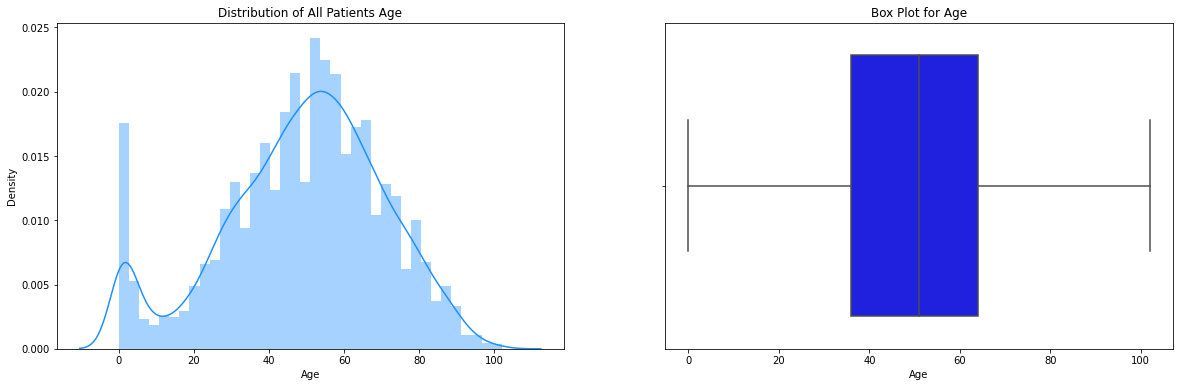

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
#sns.barplot(data=df, x='index', y= 'sex', color='lightblue');
sns.distplot(df2.AGE, color="dodgerblue")
plt.title('Distribution of All Patients Age')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(df2.AGE,color='blue')
plt.title('Box Plot for Age')
plt.xlabel('Age')

correlation of age and test results

Text(0.5, 0, 'Age')

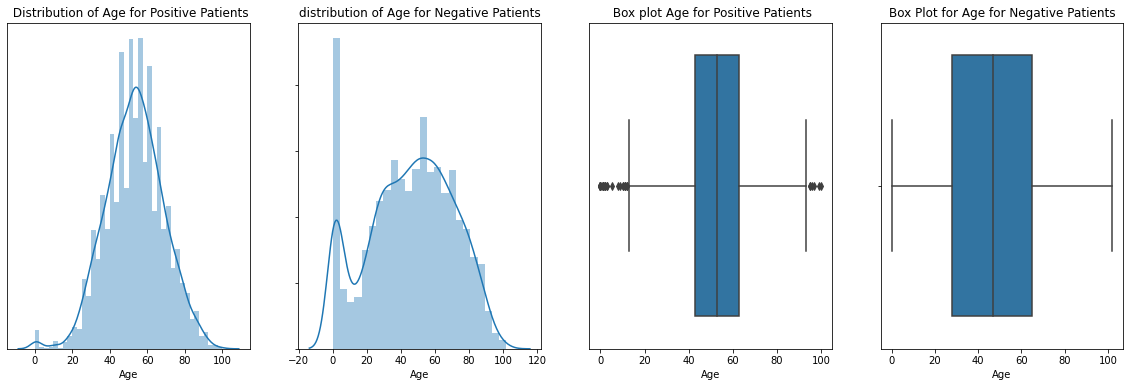

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plot = sns.distplot(df2[df2.RESULT == 1].AGE)
plot.set(ylabel = None, yticklabels = [])
plot.tick_params(left=False)
plt.title(' Distribution of Age for Positive Patients')
plt.xlabel('Age')

plt.subplot(1, 4, 2)
plot = sns.distplot(df2[df2.RESULT == 0].AGE)
plot.set(ylabel = None, yticklabels = [])
plt.title('distribution of Age for Negative Patients')
plt.xlabel('Age')

plt.subplot(1, 4, 3)
plot = sns.boxplot(df2[df2.RESULT == 1].AGE)
plot.set(ylabel = None, yticklabels = [])
plot.tick_params(left=False)
plt.title(' Box plot Age for Positive Patients')
plt.xlabel('Age')

plt.subplot(1, 4, 4)
plot = sns.boxplot(df2[df2.RESULT == 0].AGE)
plot.set(ylabel = None, yticklabels = [])
plt.title('Box Plot for Age for Negative Patients')
plt.xlabel('Age')

correlation of results with respect to the state where patient stayed and with respect to the parents location

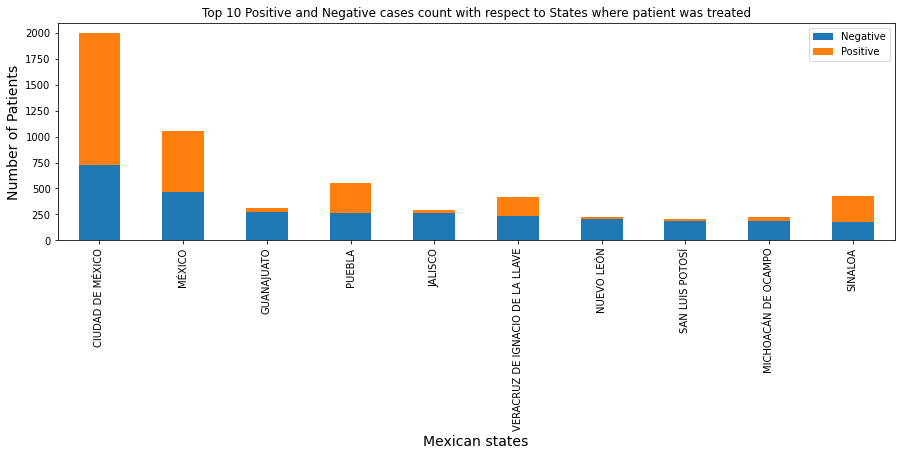

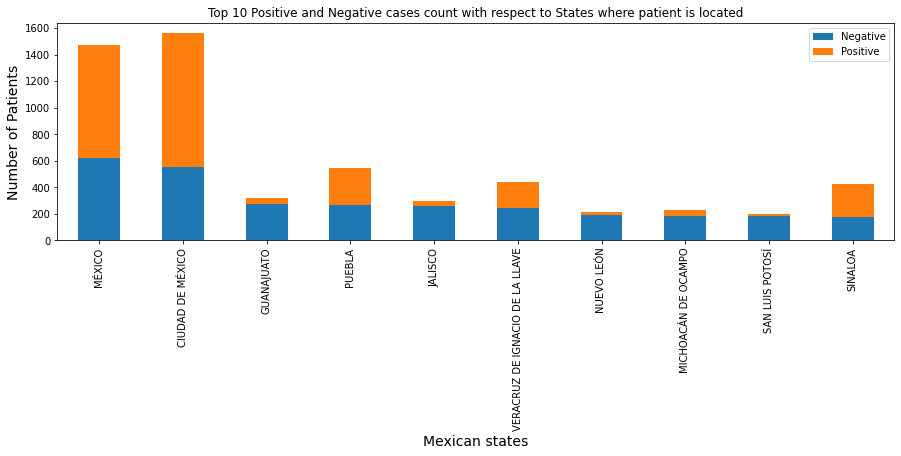

In [ ]:
pd.crosstab(df2['ENTITY UM'],df2.RESULT).sort_values(0,ascending=False).head(10).plot.bar(stacked=True,figsize=(15,4))
plt.xlabel('Mexican states',fontsize=14)
plt.ylabel('Number of Patients',fontsize=14)
plt.title('Top 10 Positive and Negative cases count with respect to States where patient was treated')
plt.legend(['Negative','Positive'])

pd.crosstab(df2['ENTITY RES'],df2.RESULT).sort_values(0,ascending=False).head(10).plot.bar(stacked=True,figsize=(15,4))
plt.xlabel('Mexican states',fontsize=14)
plt.ylabel('Number of Patients',fontsize=14)
plt.title('Top 10 Positive and Negative cases count with respect to States where patient is located')
plt.legend(['Negative','Positive'])

correlation of result with respect to gender

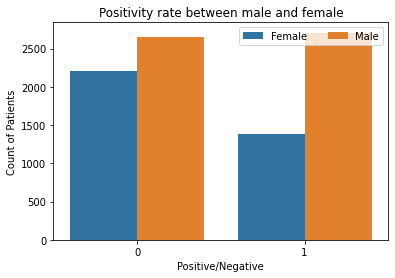

In [ ]:
sns.countplot(x="RESULT",hue="SEX",data=df2)
plt.legend(['Female', 'Male'], loc='upper right', ncol = 2)
plt.title('Positivity rate between male and female')
plt.xlabel('Positive/Negative')
plt.ylabel('Count of Patients')
plt.show()

correlation of result with respect to gender and age

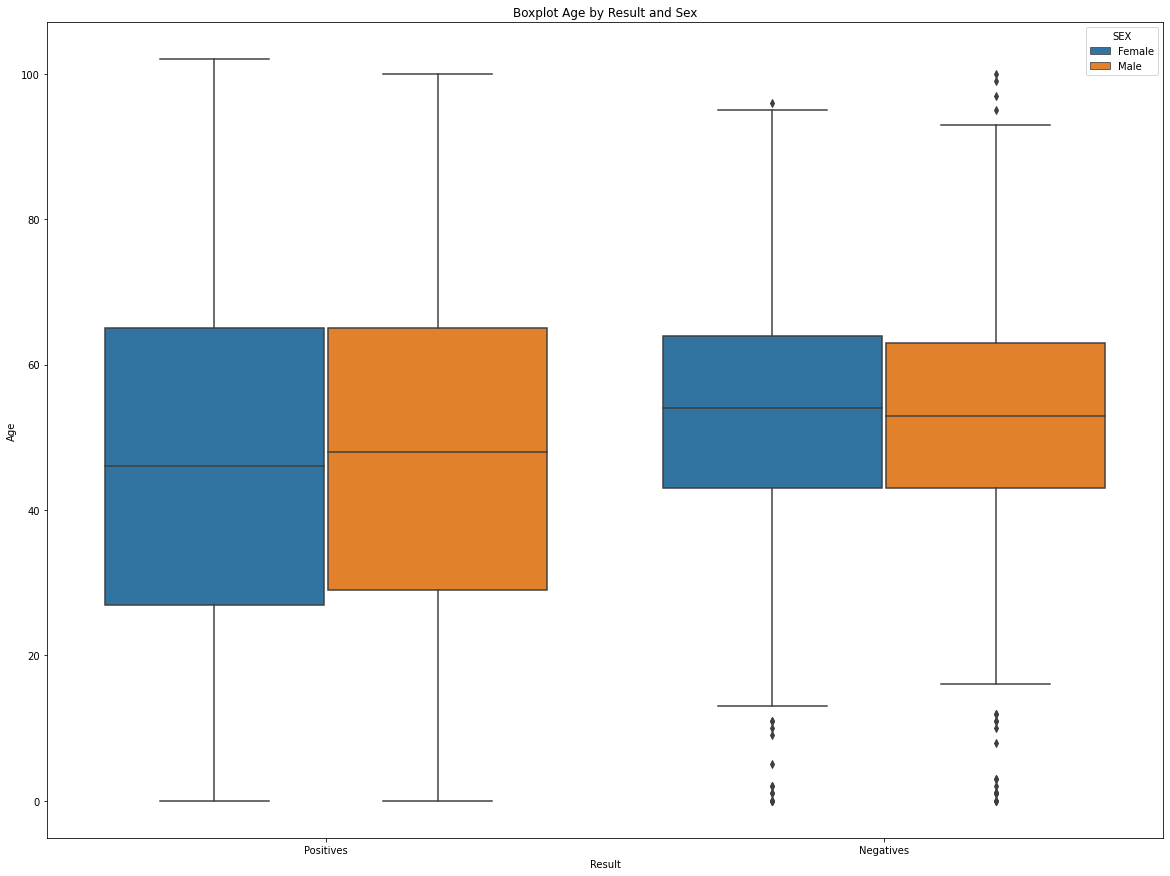

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(x = df2.RESULT, y = df2.AGE, hue = df2.SEX.replace({1:'Female', 2:'Male'}))
plt.xlabel('Result')
plt.ylabel('Age')
plt.title('Boxplot Age by Result and Sex')
ax.set(xticklabels=['Positives', 'Negatives'] )
plt.show()

analysis of illness (previous medical history) in positive patients.

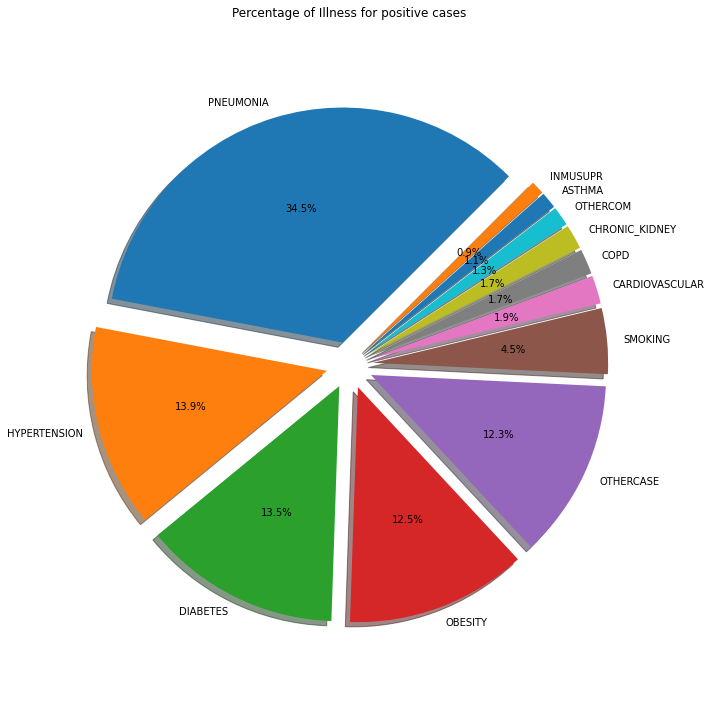

In [ ]:
illness = ['PNEUMONIA','DIABETES','ASTHMA','COPD','INMUSUPR','HYPERTENSION','CARDIOVASCULAR','OBESITY',
     'SMOKING','CHRONIC_KIDNEY','OTHERCOM','OTHERCASE']
dictionary = dict()
for name in illness:
    dictionary[name] = df2[df2.RESULT == 1].query(f'{name} == 1').shape[0]

dictionary = dict(sorted(dictionary.items(), key = lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 10))
plt.pie(dictionary.values(), labels = dictionary.keys(), explode = [0.1 for i in range(len(dictionary.values()))],
          autopct='%.1f%%', shadow = True, labeldistance = 1.07, startangle = 45)

fig = plt.gcf()
plt.title("Percentage of Illness for positive cases")
plt.axis('equal')
plt.tight_layout()
plt.show()

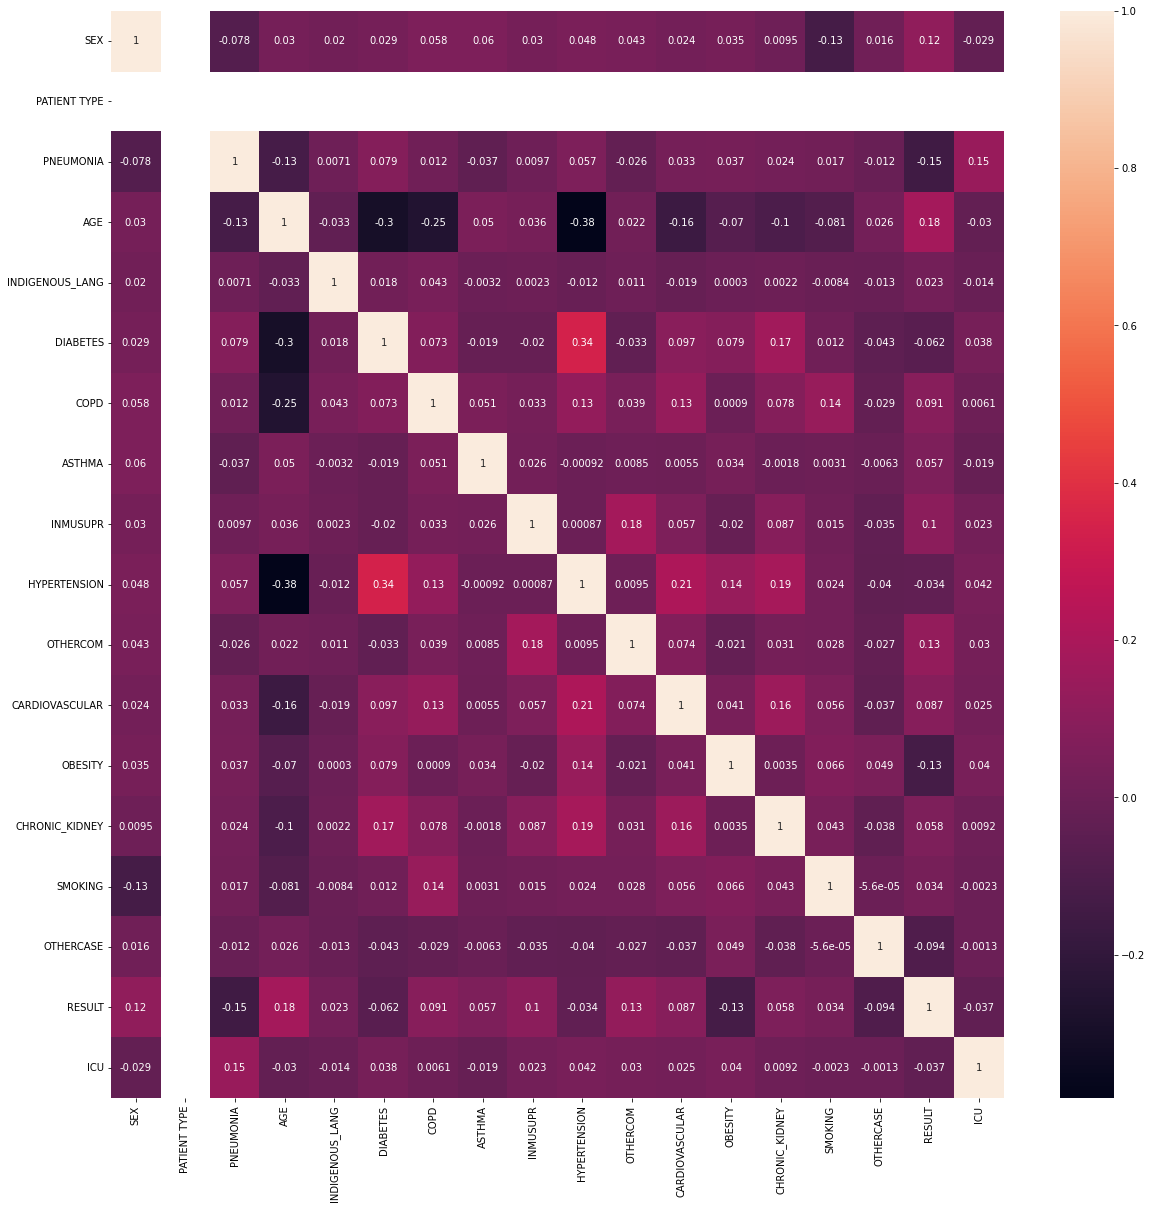

In [ ]:
corrMatrix = df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()


After analysis we would drop few columns that might not be required for modelling and analysis.

In [ ]:
df2.columns

Index(['ENTITY UM', 'SEX', 'ENTITY RES', 'PATIENT TYPE', 'PNEUMONIA', 'AGE',
       'INDIGENOUS_LANG', 'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR',
       'HYPERTENSION', 'OTHERCOM', 'CARDIOVASCULAR', 'OBESITY',
       'CHRONIC_KIDNEY', 'SMOKING', 'OTHERCASE', 'RESULT',
       'COUNTRY_NATIONALITY', 'ICU'],
      dtype='object')

In [ ]:
df_model = df2[df2.columns[~df.columns.isin(
    ['ENTITY UM', 'ENTITY RES','PATIENT TYPE','COUNTRY_NATIONALITY','ICU'])]]
df_model.head(3)

,SEX,PNEUMONIA,AGE,INDIGENOUS_LANG,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHERCOM,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,SMOKING,OTHERCASE,RESULT
5,1,2,32,2,2,2,2,2,2,2,2,2,2,2,2,0
19,1,2,27,2,2,2,2,2,2,2,2,2,2,2,1,1
29,1,1,75,2,1,2,2,2,2,2,2,2,2,2,2,1


## spliting dataset to train and test data

In [ ]:
from sklearn.model_selection import train_test_split

y=df_model.RESULT
X=df_model.drop(['RESULT'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 5,365
Test examples: 3,578


## Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve



In [ ]:
model_lg = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

from sklearn.model_selection import GridSearchCV
params = {'logreg__C': [0.01, 0.1, 1, 10,100],
          'logreg__solver': ['newton-cg', 'liblinear'], 'pca__n_components': [5,6,7,8,9,10,11]}


gcv_lg = GridSearchCV(estimator=model_lg, param_grid=params, scoring='accuracy')

gcv_lg = gcv_lg.fit(X_train, y_train)

In [ ]:
gcv_lg

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__solver': ['newton-cg', 'liblinear'],
                         'pca__n_components': [5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')

In [ ]:
gcv_lg.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=11)),
                ('logreg', LogisticRegression(C=10, solver='newton-cg'))])

In [ ]:
print(f'Validation score: {gcv_lg.best_score_:.2%}')
print(f'Test score: {gcv_lg.score(X_test, y_test):.2%}')

Validation score: 64.92%
Test score: 64.25%


In [ ]:
yhat = gcv_lg.predict(X_test)
print(classification_report(y_test, yhat, digits=3))

              precision    recall  f1-score   support

           0      0.677     0.671     0.674      1970
           1      0.601     0.608     0.605      1608

    accuracy                          0.643      3578
   macro avg      0.639     0.639     0.639      3578
weighted avg      0.643     0.643     0.643      3578



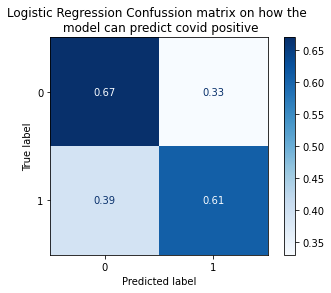

In [ ]:
plot_confusion_matrix(gcv_lg, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('Logistic Regression Confussion matrix on how the \n model can predict covid positive')
plt.show()

In [ ]:
#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#X_train, y_train = smt.fit_sample(X_train, y_train)

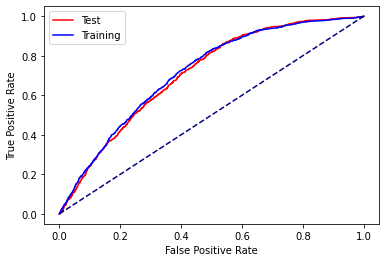

In [ ]:
y_testhat = gcv_lg.predict_proba(X_test)
pos_probstest = y_testhat[:,1] 
y_trainhat = gcv_lg.predict_proba(X_train)
pos_probstrain = y_trainhat[:,1] 


# Calculate ROC Curve for model
fpr_test, tpr_test, _ = roc_curve(y_test, pos_probstest)
fpr_train, tpr_train, _ = roc_curve(y_train, pos_probstrain)


# Plot model ROC Curve
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## Decision Tree

In [ ]:
model_dt = Pipeline([('dt', DecisionTreeClassifier())]
)

param_dt = [
  {'dt__max_depth': [20,25,30,35],
   'dt__min_samples_split':[20, 40,50],
   'dt__min_samples_leaf': [2, 5,10],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_dt = GridSearchCV(estimator=model_dt, 
                           param_grid=param_dt, scoring='accuracy', refit=True)
gcv_dt = gcv_dt.fit(X_train, y_train)

gcv_dt.best_estimator_

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_leaf=2,
                                        min_samples_split=50))])

In [ ]:
print(f'Validation score: {gcv_dt.best_score_:.2%}')
print(f'Test score: {gcv_dt.score(X_test, y_test):.2%}')

Validation score: 65.42%
Test score: 64.53%


In [ ]:
y_testp = gcv_dt.predict(X_test)
y_testp_dt = gcv_dt.predict_proba(X_test)
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.71      0.61      0.65      1970
           1       0.59      0.69      0.64      1608

    accuracy                           0.65      3578
   macro avg       0.65      0.65      0.65      3578
weighted avg       0.65      0.65      0.65      3578



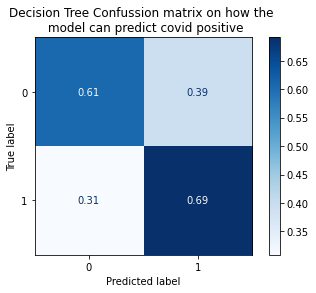

In [ ]:
plot_confusion_matrix(gcv_dt, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('Decision Tree Confussion matrix on how the \n model can predict covid positive')
plt.show()

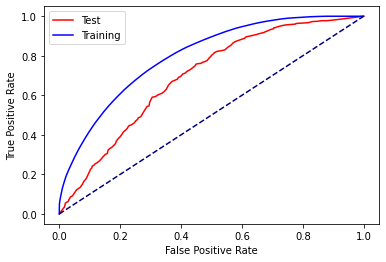

In [ ]:
y_testhat = gcv_dt.predict_proba(X_test)
pos_probstest = y_testhat[:,1] 
y_trainhat = gcv_dt.predict_proba(X_train)
pos_probstrain = y_trainhat[:,1] 

from sklearn.metrics import roc_curve

# Calculate ROC Curve for model
fpr_test, tpr_test, _ = roc_curve(y_test, pos_probstest)
fpr_train, tpr_train, _ = roc_curve(y_train, pos_probstrain)


# Plot model ROC Curve
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## Random forest

In [ ]:
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier())]
)

param_rf = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10],
               'rf__class_weight': ['balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_rf, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_results.best_estimator_

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        max_samples=2000, n_estimators=10))])

In [ ]:
print(f'Validation score: {rf_results.best_score_:.2%}')
print(f'Test score: {rf_results.score(X_test, y_test):.2%}')

Validation score: 81.44%
Test score: 82.28%


In [ ]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.78      0.51      0.61      1970
           1       0.58      0.82      0.68      1608

    accuracy                           0.65      3578
   macro avg       0.68      0.67      0.65      3578
weighted avg       0.69      0.65      0.64      3578



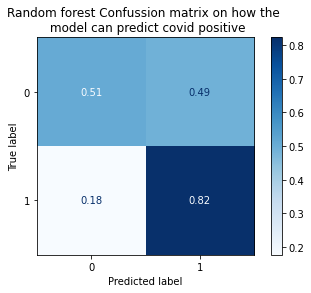

In [ ]:
plot_confusion_matrix(rf_results, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('Random forest Confussion matrix on how the \n model can predict covid positive')
plt.show()

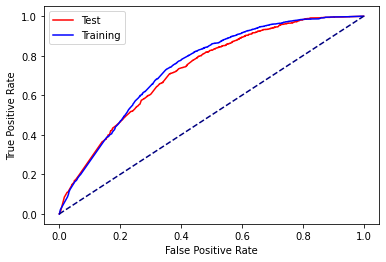

In [ ]:
y_testhat = rf_results.predict_proba(X_test)
pos_probstest = y_testhat[:,1] 
y_trainhat = rf_results.predict_proba(X_train)
pos_probstrain = y_trainhat[:,1] 


# Calculate ROC Curve for model
fpr_test, tpr_test, _ = roc_curve(y_test, pos_probstest)
fpr_train, tpr_train, _ = roc_curve(y_train, pos_probstrain)


# Plot model ROC Curve
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
svm_m = modeling_pipeline = Pipeline([('svc', SVC(probability=True))])


param_svc = [
  {'svc__C': [0.01, 0.1, 1, 10], 'svc__kernel': ['linear']}
 ]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_svc, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(X_train, y_train)
svm_results.best_estimator_

Pipeline(steps=[('svc', SVC(C=10, kernel='linear', probability=True))])

In [ ]:
print(f'Validation score: {svm_results.best_score_:.2%}')
print(f'Test score: {svm_results.score(X_test, y_test):.2%}')

Validation score: 65.67%
Test score: 65.32%


In [ ]:
y_testp = svm_results.predict(X_test)
y_testp_rf = svm_results.predict_proba(X_test)
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1970
           1       0.60      0.68      0.64      1608

    accuracy                           0.65      3578
   macro avg       0.65      0.66      0.65      3578
weighted avg       0.66      0.65      0.65      3578



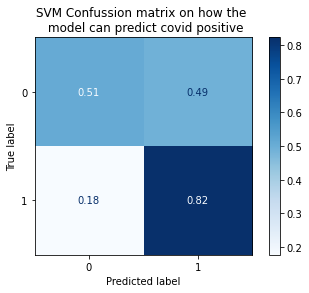

In [ ]:
plot_confusion_matrix(rf_results, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('SVM Confussion matrix on how the \n model can predict covid positive')
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

nb_m = modeling_pipeline = Pipeline([('model', MultinomialNB())])


param_nb = [
  {'model__alpha': [1,2,3,4]}
 ]

nb_results = GridSearchCV(estimator=nb_m, param_grid=param_nb, scoring='accuracy', refit=True, cv=5)
nb_results = nb_results.fit(X_train, y_train)


In [ ]:
nb_results.best_estimator_

Pipeline(steps=[('model', MultinomialNB(alpha=2))])

In [ ]:
print(f'Validation score: {nb_results.best_score_:.2%}')
print(f'Test score: {nb_results.score(X_test, y_test):.2%}')

Validation score: 56.31%
Test score: 55.53%


In [ ]:
y_testp = nb_results.predict(X_test)
y_testp_rf = nb_results.predict_proba(X_test)
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1970
           1       0.50      0.56      0.53      1608

    accuracy                           0.56      3578
   macro avg       0.56      0.56      0.55      3578
weighted avg       0.56      0.56      0.56      3578



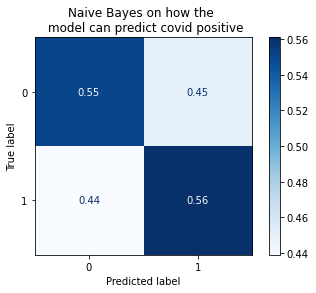

In [ ]:
plot_confusion_matrix(nb_results, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('Naive Bayes on how the \n model can predict covid positive')
plt.show()

## KNN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_knn = [
  {'model__n_neighbors': [ 10, 15,20,25], 'model__weights': ['uniform','distance']}
 ]

knn_m = modeling_pipeline = Pipeline([('model', KNeighborsClassifier())])

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)


In [ ]:
knn_results.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=25))])

In [ ]:
print(f'Validation score: {knn_results.best_score_:.2%}')
print(f'Test score: {knn_results.score(X_test, y_test):.2%}')

Validation score: 63.34%
Test score: 62.30%


In [ ]:
y_testp = knn_results.predict(X_test)
y_testp_rf = knn_results.predict_proba(X_test)
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62      1970
           1       0.56      0.71      0.63      1608

    accuracy                           0.62      3578
   macro avg       0.63      0.63      0.62      3578
weighted avg       0.64      0.62      0.62      3578



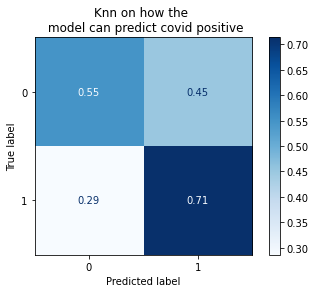

In [ ]:
plot_confusion_matrix(knn_results, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.title('Knn on how the \n model can predict covid positive')
plt.show()